# EDA of the state.x77 R dataset

## 3rd discussion exercise for the Statistical-Thinking-for-Data-Science MOOC course in edX

Importing python libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
sns.set()

Importing data:

In [2]:
df = pd.read_csv('/home/caio/Desktop/edX/ColumbiaX-Statistical-Thinking-for-Data-Science/statex77.csv')

First five states in the dataset:

In [4]:
df.head()

,Unnamed: 0,Population,Income,Illiteracy,Life Exp,Murder,HS Grad,Frost,Area
0,Alabama,3615,3624,2.1,69.05,15.1,41.3,20,50708
1,Alaska,365,6315,1.5,69.31,11.3,66.7,152,566432
2,Arizona,2212,4530,1.8,70.55,7.8,58.1,15,113417
3,Arkansas,2110,3378,1.9,70.66,10.1,39.9,65,51945
4,California,21198,5114,1.1,71.71,10.3,62.6,20,156361


In this analysis I wanted to categorize one of the variables. It's funny how in the last two lessons, she taught us test of independence and ANOVA, and how both tests deal with at least one categorical variable and in the end she provide us a dataset with only quantitative variables. Hence, I chose a variable out of whim: HS Grad, the percentage of population with High school degrees in that state in 1970. By having a look at the histogram of that variable, it seemed to me that dividing the x axis in 3 regions would be a great way to discretize HS Grad. The ranges I chose were from 0 to 45, from 45 to 55 and from 55 to 100. The idea is to perform an ANOVA test with this newly created variable and some other later on. Have a look, and see if you agree with the way I discretized HS Grad: 

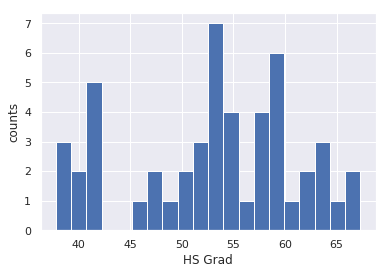

In [74]:
df['HS Grad'].hist(bins=20)
plt.ylabel('counts')
plt.xlabel('HS Grad')
plt.show()

Here I actualy categorize the variable and labeled the ranges as low, mid and high:

In [26]:
df['HSGrad_cat'] = pd.cut(df['HS Grad'], bins=[0,45,55,100], include_lowest=True, labels=['low','mid','high'])

The categories are not equally populated, but that's ok.

In [72]:
df['HSGrad_cat'].value_counts()

high    21
mid     19
low     10
Name: HSGrad_cat, dtype: int64

Here I make a bar plot to assess the association between the HS Grad variable (categorized) and the Illiteracy variable. Naturally I would expect that the higher the number of high school graduates, the lower the illiteracy. That seems to be the case. But notice that there isn't much a difference between the high and mid categories. Maybe that has to do with the way I categorized HS Grad? Who knows. I leave it up to you to find out.

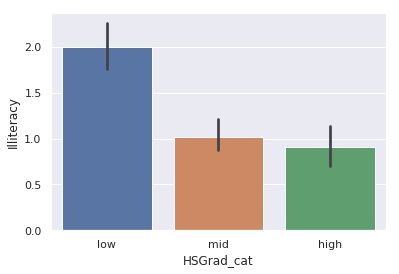

In [66]:
sns.barplot(df['HSGrad_cat'],df['Illiteracy'])
plt.show()

Here I tried to look at the actual distributions and not just the averages in each population. That gives us a more clear picture of what is going on.

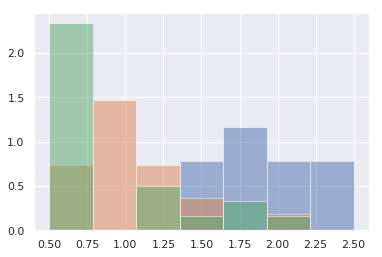

In [68]:
plt.hist(df[df['HSGrad_cat']=='low']['Illiteracy'],bins=7,range=(0.5,2.5),alpha=0.5,density=True)
plt.hist(df[df['HSGrad_cat']=='mid']['Illiteracy'],bins=7,range=(0.5,2.5),alpha=0.5,density=True)
plt.hist(df[df['HSGrad_cat']=='high']['Illiteracy'],bins=7,range=(0.5,2.5),alpha=0.5,density=True)
plt.show()

Finally, I perform an ANOVA test to be certain of whether there is an association between the HS Grad groups and the Illiteracy variable. The statistic generated by the one way ANOVA is the F statistic, which represents the ratio of between group variability over the within group variability (Refer to: https://en.wikipedia.org/wiki/F-test#Multiple-comparison_ANOVA_problems). Observe how this ratio is very high, and the associated p-value is magnitudes under the commoly accepted 0.05 significance. This only confirms what we already know, there IS an association between Illiteracy and the HS Grad categorical variable.

In [76]:
fval,pval = stats.f_oneway(df[df['HSGrad_cat']=='low']['Illiteracy'],df[df['HSGrad_cat']=='mid']['Illiteracy'],df[df['HSGrad_cat']=='high']['Illiteracy'])
print("F statistic: {} || p-value: {}".format(round(fval,2),round(pval,7)))

F statistic: 21.68 || p-value: 2e-07


The possibilities of futher EDA (exploratory data analysis) are almost limitless. Of course, to be more practical you need to know what you're looking for. Below, I display a pair plot where the instances are grouped according to the HS Grad category. Other interesting insights can be extracted from this analysis. I also confirmed here another assumption: States with less Murder tend to have more high school grads! Have a look and see if you can find other interesting relations!

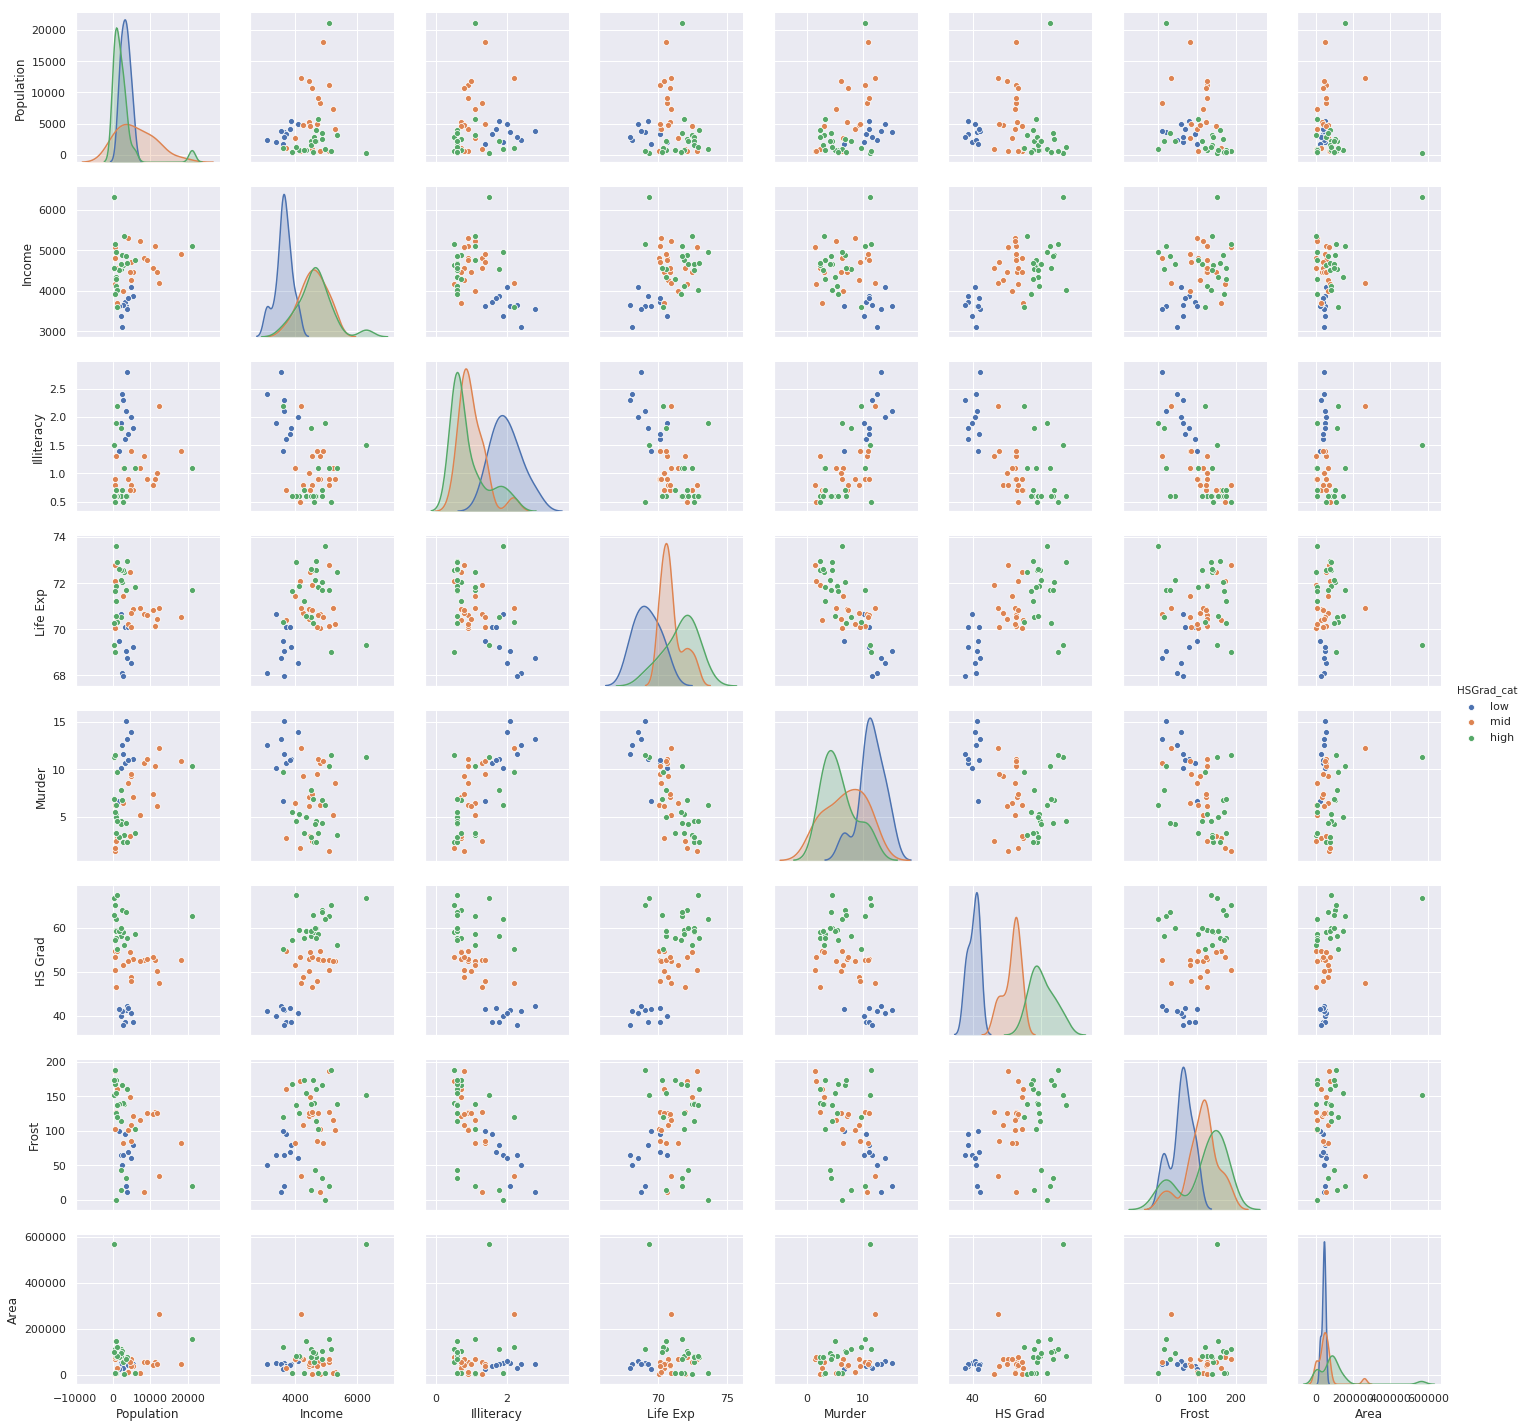

In [77]:
sns.pairplot(df,hue= 'HSGrad_cat')
plt.show()

Before going away I leave you with this funny finding. The second strongest correlation that we observe for the Illiteracy variable is with the Frost variable! Maybe that has to do with how northern states in the US had better education in the 70s? You tell me, I not from America :)

In [80]:
corrs = df.corr()
np.abs(corrs['Illiteracy']).sort_values(ascending=False)

Illiteracy    1.000000
Murder        0.702975
Frost         0.671947
HS Grad       0.657189
Life Exp      0.588478
Income        0.437075
Population    0.107622
Area          0.077261
Name: Illiteracy, dtype: float64

Good luck!